# Testing different release rate functions


In this notebook we plot different versions of the locking rate function. This is done for the sake of discussion. 


Here, we define the *release rate function* $r:\mathbb{R}^2_{\geq 0}\to(0,1)$ as a function that maps Total Value Locked (TVL), denoted by $T$, and number of validators $V$ into a number between 0 and 1, representing the total proportion of availables funds released for distribution. We will consider 4 different fucntions 





## Linear Function:

The simples form is to have a (bi)linear release rate function. In this setting we propose $$r(V,T)=a\frac{T}{T_\text{max}} + (1-a)\frac{V}{ V_\text{max}}$$
 where $a$ is a parameter that gives a relative weight to validators Vs TVL, and $T_\text{max}$, $V_\text{max}$ are the maximum TVL and number of validators, respectively.

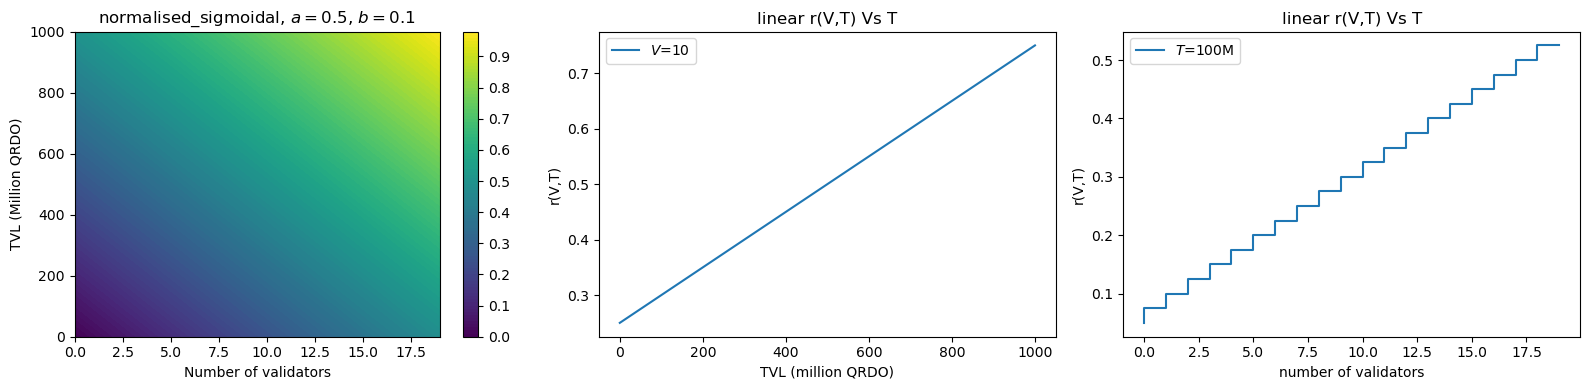

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def linear(V,T,V_max,T_max,a):
    r=a*T/T_max + (1-a)*V/V_max
    return r

plt.figure(figsize=(16,4))
plt.subplot(131)
t=np.linspace(0,1000,1000) #TVL in millions of Token 
v=np.arange(0,20)
T,V=np.meshgrid(t,v)
a=1/2
p=plt.contourf(V,T,linear(V,T,a=a,T_max=1000,V_max=20),100)
plt.xlabel('Number of validators')
plt.ylabel('TVL (Million QRDO)')
plt.title(r'normalised_sigmoidal, $a=${}, $b=${}'.format(a,b))
plt.colorbar(p)
plt.subplot(132)
plt.plot(t,linear(10,t,a=a,T_max=1000,V_max=20),label=r'$V$=10')
plt.title('linear r(V,T) Vs T')
plt.xlabel('TVL (million QRDO)')
plt.ylabel('r(V,T)')
plt.legend()
plt.subplot(133)
plt.step(v,linear(v,T=100,a=a,T_max=1000,V_max=20),label=r'$T$=100M')
plt.title('linear r(V,T) Vs T')
plt.xlabel('number of validators')
plt.ylabel('r(V,T)')
plt.legend()
plt.tight_layout()

## Normalised Sigmoidal Function:

The sigmoid function as mentioned previously has an output between 0 and 1, which naturally fits your requirements. The function could be adjusted to take TVL (T) and validators (V) as input:
$$r(V,T;a,b) = 2\left(\frac{1}{ 1 + e^{-aT-bV}}-\frac{1}{2}\right)\cdot \mathbf{1}_{(V>0)}\cdot \mathbf{1}_{( T>0)}$$
Here, $a\in\mathbb{R}_{>0}$ and $b\in\mathbb{R}_{>0}$ are positive constants. This function starts at 0 (for $T=V=0$), increases quickly, and then asymptotically approaches 1 as TVL and validators increase. The constants $a$ and $b$ control the shape of the sigmoid, in particular, a larger $a$ (resp. $b$) will put a larger weight into $T$ or $V$, making the function $r$ go to $1$ faster with these values. 

**This function encourages early adoption**

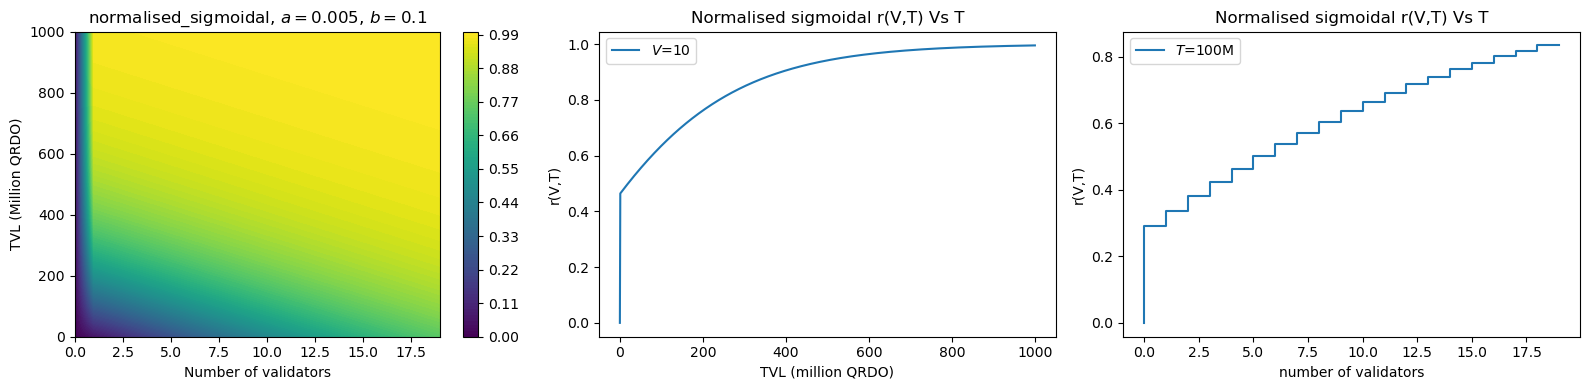

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def normalised_sigmoidal(V,T,a,b):
    r=2*(1/(1+np.exp(-a*T-b*V))-0.5)*(T>0)*(V>0)

    return r
plt.figure(figsize=(16,4))
plt.subplot(131)
t=np.linspace(0,1000,1000) #TVL in millions of Token 
v=np.arange(0,20)
T,V=np.meshgrid(t,v)
a=1/200
b=1/10
p=plt.contourf(V,T,normalised_sigmoidal(V,T,a,b),100)
plt.xlabel('Number of validators')
plt.ylabel('TVL (Million QRDO)')
plt.title(r'normalised_sigmoidal, $a=${}, $b=${}'.format(a,b))
plt.colorbar(p)
plt.subplot(132)
plt.plot(t,normalised_sigmoidal(10,t,a=a,b=b),label=r'$V$=10')
plt.title('Normalised sigmoidal r(V,T) Vs T')
plt.xlabel('TVL (million QRDO)')
plt.ylabel('r(V,T)')
plt.legend()
plt.subplot(133)
plt.step(v,normalised_sigmoidal(v,T=100,a=a,b=b),label=r'$T$=100M')
plt.title('Normalised sigmoidal r(V,T) Vs T')
plt.xlabel('number of validators')
plt.ylabel('r(V,T)')
plt.legend()
plt.tight_layout()

## Fractional Power Function:
This function is based on a fractional power, which grows slower than linear but faster than a logarithm. To keep it between 0 and 1, we normalize it with the maximum possible value. If we denote the maximum possible TVL and validator count as $T_\text{max}$ and $V_\text{max}$ respectively, the function would look like:

$$r(V,T) = \frac{T^a + bV^a}{T_\text{max}^a + bV_\text{max}^a}$$

This function increases as $T$ and $V$ increase, but the growth rate decreases over time. The constant $a$ should be between 0 and 1 to ensure that the function is increasing. The parameter $b$ controls the relative influence of TVL and validators on the output.

**This function encourages early adoption**

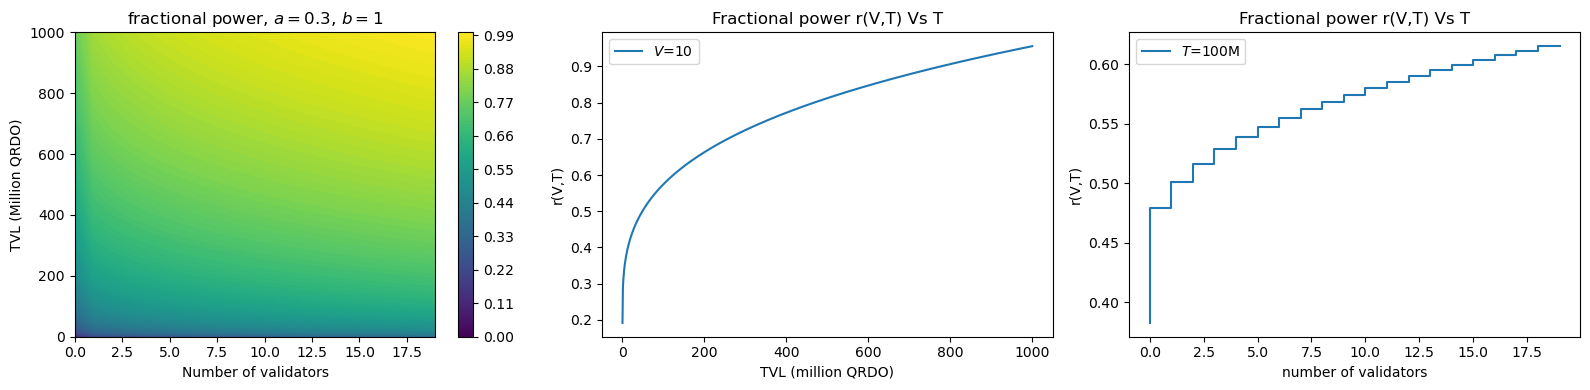

In [86]:
def fractional_power(V,T, T_max, V_max, a, b):
    return ((T**a + b*V**a) / (T_max**a + b*V_max**a))

    return r
plt.figure(figsize=(16,4))
plt.subplot(131)
a=0.3
b=1
T_max=1000
V_max=20
p=plt.contourf(V,T,fractional_power(T, V, T_max, V_max, a, b),100)
plt.xlabel('Number of validators')
plt.ylabel('TVL (Million QRDO)')
plt.title(r'fractional power, $a=${}, $b=${}'.format(a,b))
plt.colorbar(p)
plt.subplot(132)
plt.plot(t,fractional_power(10, t, T_max, V_max, a, b),label=r'$V$=10')
plt.title('Fractional power r(V,T) Vs T')
plt.xlabel('TVL (million QRDO)')
plt.ylabel('r(V,T)')
plt.legend()
plt.subplot(133)
plt.step(v,fractional_power(v, 100, T_max, V_max, a, b),label=r'$T$=100M')
plt.title('Fractional power r(V,T) Vs T')
plt.xlabel('number of validators')
plt.ylabel('r(V,T)')
plt.legend()
plt.tight_layout()

## Fractional Power Function 2:
This function is based on a fractional power, which grows slower than linear but faster than a logarithm. To keep it between 0 and 1, we normalize it with the maximum possible value. If we denote the maximum possible TVL and validator count as $T_\text{max}$ and $V_\text{max}$ respectively, the function would look like:

$$r(V,T) = \frac{1}{2}\left(\frac{T}{T_\text{max}}\right)^a +\frac{1}{2}\left(\frac{V}{V_\text{max}}\right)^b$$

with $a,b\in(0,1)$ determining the growth rate. 

**This function encourages early adoption**

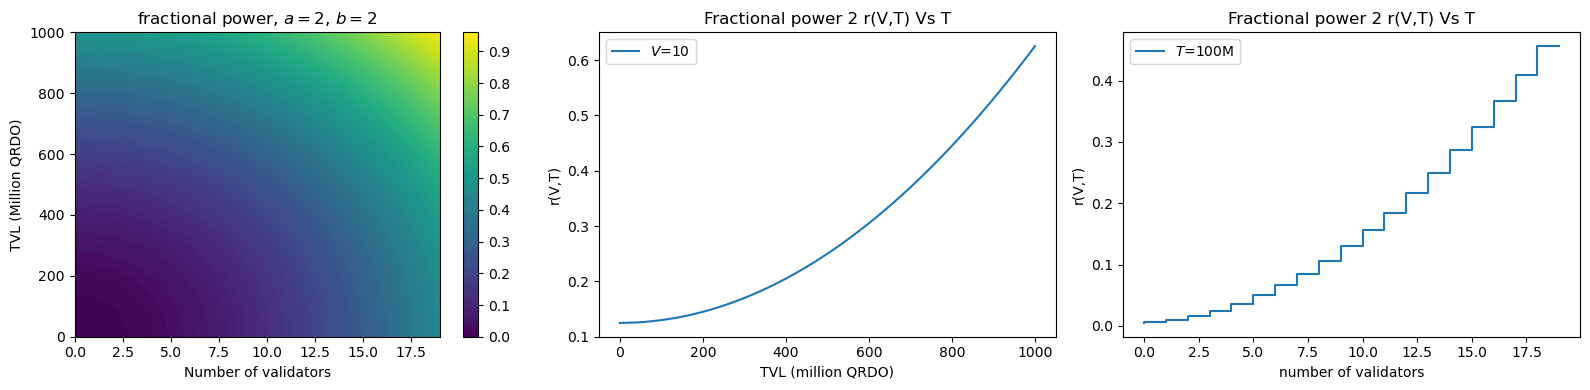

In [88]:
def fractional_power_2(V, T, T_max, V_max, a, b):
    term1 = (T / T_max) ** a
    term2 = (V / V_max) ** b
    r = 0.5 * term1 + 0.5 * term2
    return r

plt.figure(figsize=(16,4))
plt.subplot(131)
a=2
b=2
T_max=1000
V_max=20
p=plt.contourf(V,T,fractional_power_2(V,T, T_max, V_max, a, b),100)
plt.xlabel('Number of validators')
plt.ylabel('TVL (Million QRDO)')
plt.title(r'fractional power, $a=${}, $b=${}'.format(a,b))
plt.colorbar(p)
plt.subplot(132)
plt.plot(t,fractional_power_2(10, t, T_max, V_max, a, b),label=r'$V$=10')
plt.title('Fractional power 2 r(V,T) Vs T')
plt.xlabel('TVL (million QRDO)')
plt.ylabel('r(V,T)')
plt.legend()
plt.subplot(133)
plt.step(v,fractional_power_2(v, 100, T_max, V_max, a, b),label=r'$T$=100M')
plt.title('Fractional power 2 r(V,T) Vs T')
plt.xlabel('number of validators')
plt.ylabel('r(V,T)')
plt.legend()
plt.tight_layout()